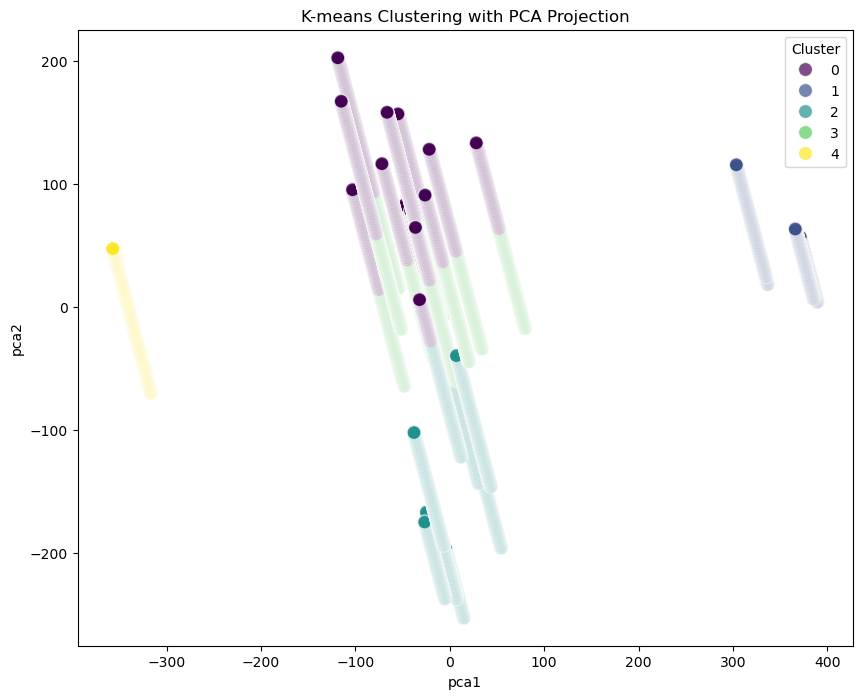

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# data loading
file_path = "merged_games_with_scores.xlsx"
df = pd.read_excel(file_path)

# data cleaning
df.columns = [col.replace(" ", "_").replace("-", "_").replace(".", "_").lower() for col in df.columns]

# select numeric columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numerical_cols].dropna()  # Drop rows with NaN values

# K-means Clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_numeric['cluster'] = kmeans.fit_predict(df_numeric)

# PCA for 2D Projection
pca = PCA(n_components=2)
df_numeric[['pca1', 'pca2']] = pca.fit_transform(df_numeric)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='pca1', 
    y='pca2', 
    hue='cluster', 
    palette='viridis', 
    data=df_numeric,
    s=100,  # Size of points
    alpha=0.7  # Transparency
)

plt.title("K-means Clustering with PCA Projection")
plt.legend(title="Cluster")
plt.show()


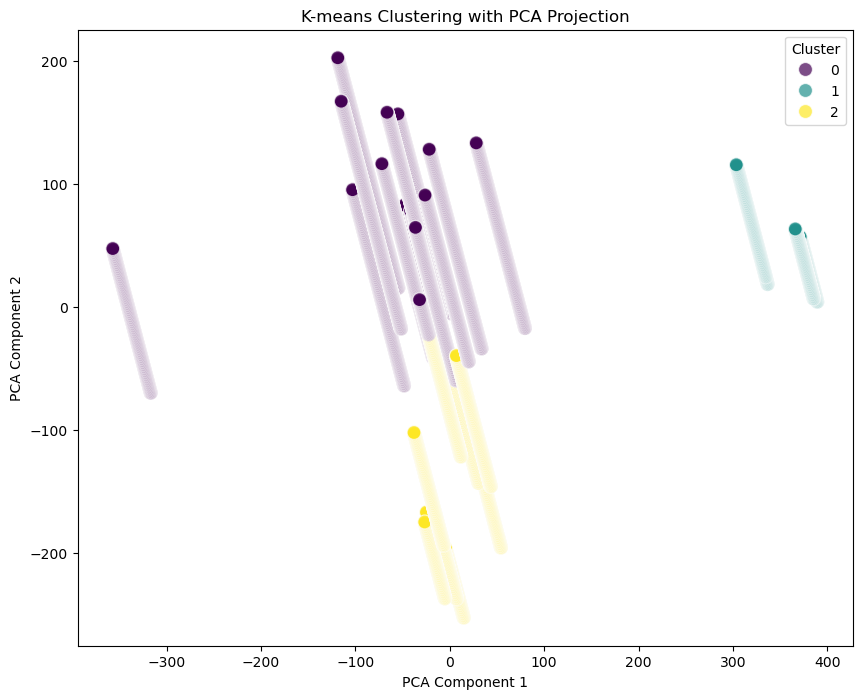

In [25]:
# data loading
file_path = "merged_games_with_scores.xlsx"
df = pd.read_excel(file_path)

# data cleaning
df.columns = [col.replace(" ", "_").replace("-", "_").replace(".", "_").lower() for col in df.columns]

# select numeric columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numerical_cols].dropna()  # Drop rows with NaN values

# K-means Clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_numeric['cluster'] = kmeans.fit_predict(df_numeric)

# PCA for 2D Projection
pca = PCA(n_components=2)
df_numeric[['pca1', 'pca2']] = pca.fit_transform(df_numeric)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='pca1', 
    y='pca2', 
    hue='cluster', 
    palette='viridis', 
    data=df_numeric,
    s=100,  # Size of points
    alpha=0.7  # Transparency
)

plt.title("K-means Clustering with PCA Projection")
plt.legend(title="Cluster")
plt.show()


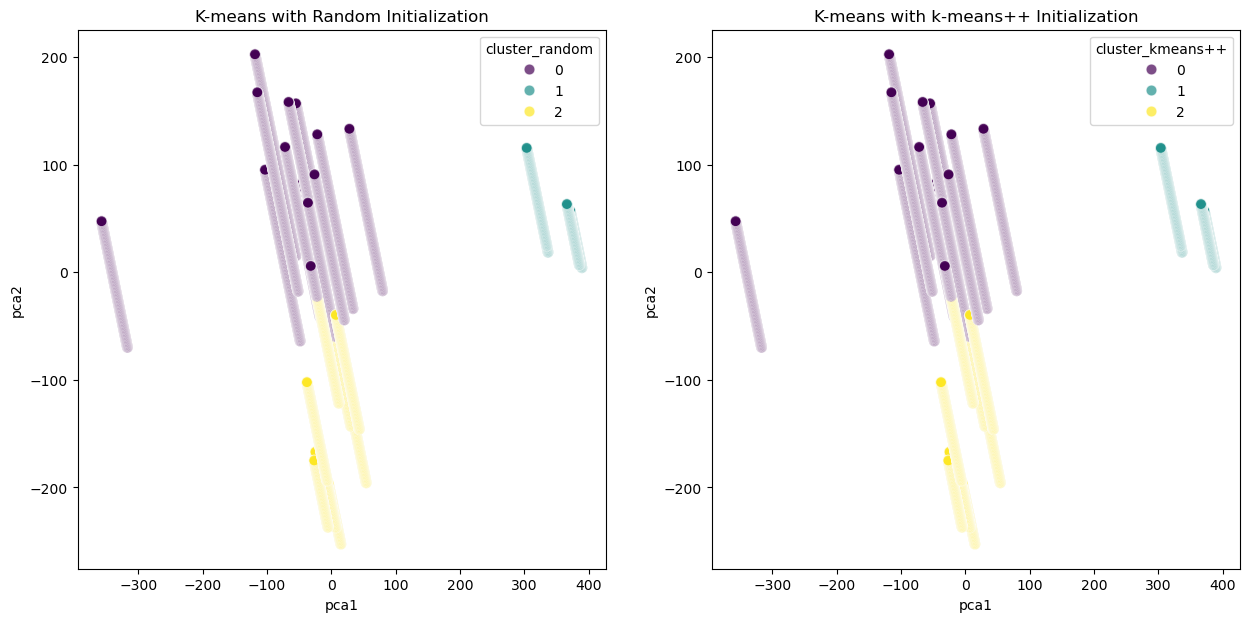

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce data to 2D for visualization
pca = PCA(n_components=2)
df_numeric[['pca1', 'pca2']] = pca.fit_transform(df_numeric[numerical_cols])

# Create subplots for each clustering initialization
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plot for random initialization
sns.scatterplot(
    ax=axes[0],
    x='pca1', y='pca2',
    hue='cluster_random',
    palette='viridis',
    data=df_numeric,
    s=60,
    alpha=0.7
)
axes[0].set_title("K-means with Random Initialization")

# Plot for k-means++ initialization
sns.scatterplot(
    ax=axes[1],
    x='pca1', y='pca2',
    hue


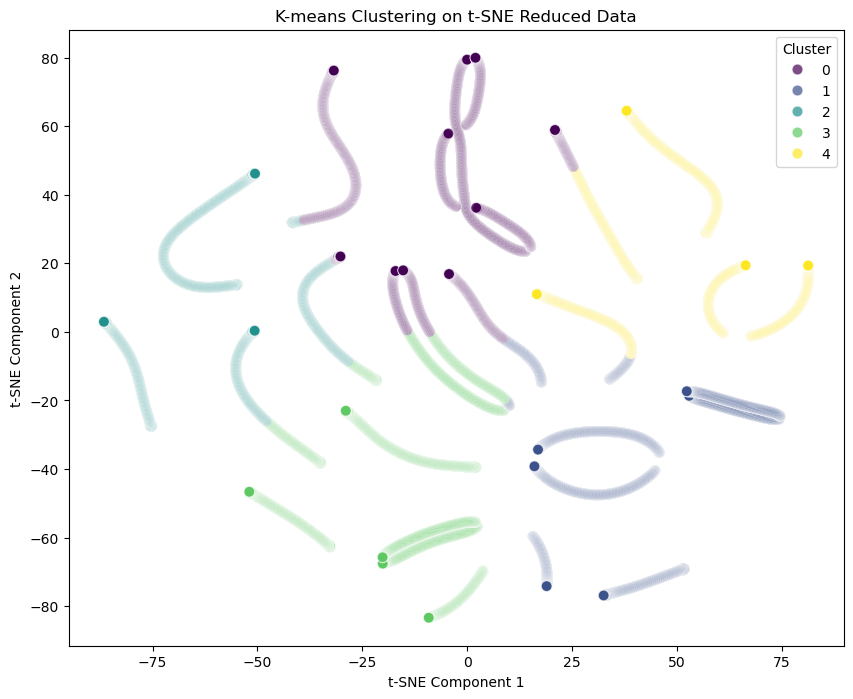

In [43]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step 1: Apply t-SNE to reduce the data to 2D
tsne = TSNE(n_components=2, random_state=42)
df_numeric[['tsne1', 'tsne2']] = tsne.fit_transform(df_numeric[numerical_cols])

# Step 2: Perform K-means clustering on the t-SNE output
n_clusters = 5  # You can adjust this based on previous analysis
kmeans_tsne = KMeans(n_clusters=n_clusters, random_state=42)
df_numeric['cluster_tsne'] = kmeans_tsne.fit_predict(df_numeric[['tsne1', 'tsne2']])

# Step 3: Plot the t-SNE results with K-means clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='tsne1', 
    y='tsne2', 
    hue='cluster_tsne', 
    palette='viridis', 
    data=df_numeric,
    s=60, 
    alpha=0.7
)

# Add plot details
plt.title("K-means Clustering on t-SNE Reduced Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()


In [92]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load your dataset (assuming it's stored as a CSV)
data = pd.read_excel('merged_games_with_scores_.xlsx')

# Selecting only the board state columns for dimensionality reduction
board_state_columns = data.loc[:, 'aa':'ss']
player_info_columns = data[['game_id', 'move_id', 'winner_color', 'level']]  # To keep track of each move/game info

# PCA Projection
pca = PCA(n_components=2)  # Project down to 2 dimensions
pca_result = pca.fit_transform(board_state_columns)
player_info_columns['PCA1'] = pca_result[:, 0]
player_info_columns['PCA2'] = pca_result[:, 1]

C:\Users\Hannah\AppData\Local\Temp\ipykernel_7872\2105862261.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_info_columns['PCA1'] = pca_result[:, 0]
C:\Users\Hannah\AppData\Local\Temp\ipykernel_7872\2105862261.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_info_columns['PCA2'] = pca_result[:, 1]


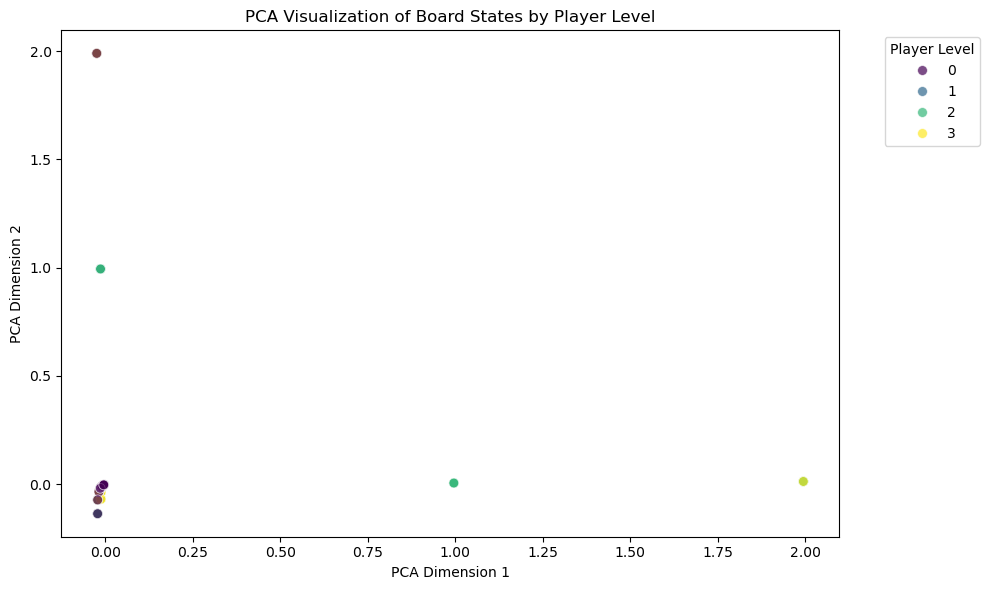

In [96]:
import seaborn as sns
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='level',  # Color by player level
    palette='viridis',  # Color map (adjust as needed)
    data=player_info_columns,
    s=50,  # Marker size
    alpha=0.7  # Transparency
)

plt.title('PCA Visualization of Board States by Player Level')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend(title='Player Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

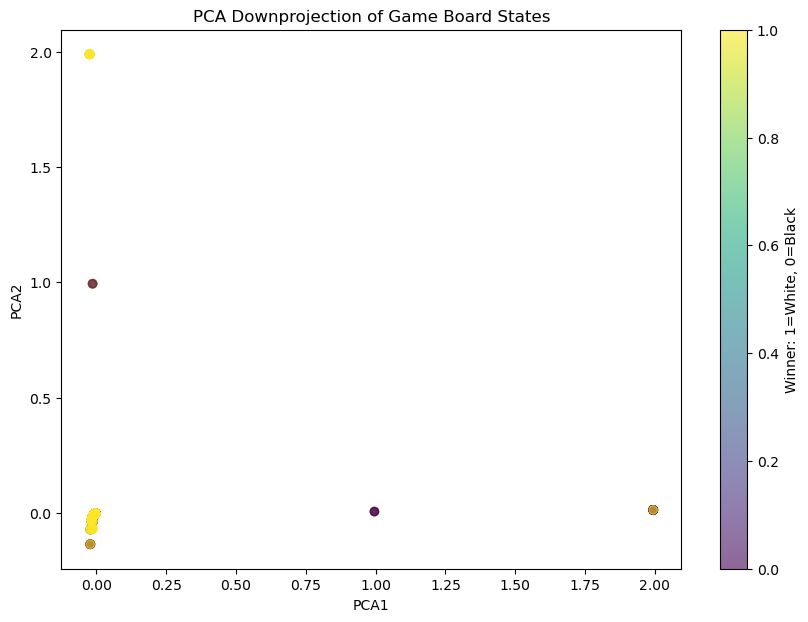

In [106]:

# Plotting PCA results
plt.figure(figsize=(10, 7))
plt.scatter(player_info_columns['PCA1'], player_info_columns['PCA2'], c=(player_info_columns['winner_color'] == 'white').astype(int), alpha=0.6)
plt.title('PCA Downprojection of Game Board States')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Winner: 1=White, 0=Black')
plt.show()

C:\Users\Hannah\AppData\Local\Temp\ipykernel_7872\2931802779.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_info_columns['tSNE1'] = tsne_result[:, 0]
C:\Users\Hannah\AppData\Local\Temp\ipykernel_7872\2931802779.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_info_columns['tSNE2'] = tsne_result[:, 1]


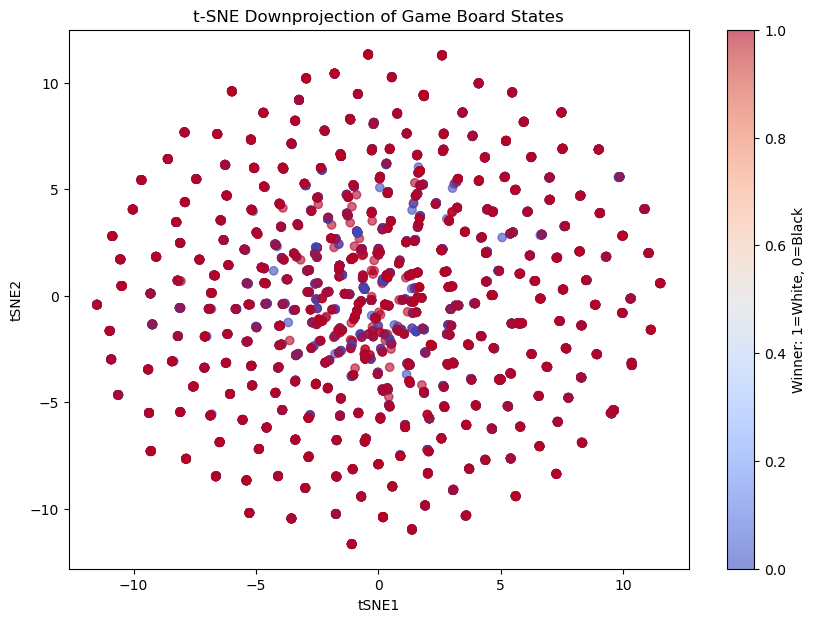

In [108]:
# t-SNE Projection
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(board_state_columns)
player_info_columns['tSNE1'] = tsne_result[:, 0]
player_info_columns['tSNE2'] = tsne_result[:, 1]

# Plotting t-SNE results
plt.figure(figsize=(10, 7))
plt.scatter(player_info_columns['tSNE1'], player_info_columns['tSNE2'], c=(player_info_columns['winner_color'] == 'white').astype(int), cmap='coolwarm', alpha=0.6)
plt.title('t-SNE Downprojection of Game Board States')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.colorbar(label='Winner: 1=White, 0=Black')
plt.show()

In [146]:
alt.Chart(player_info_columns.query('level == 2 & move_id < 10')).mark_line(
    opacity=0.6,
    point=alt.MarkConfig(size=200) 
).encode(
    x='tSNE1',
    y='tSNE2',
    color='move_id:N',
    shape='move_id:N',
    order='index:Q'
).properties(
    width=700,
    height=700,
    title="Paths of solving attempts"
).interactive()

alt.Chart(...)

In [112]:
alt.Chart(player_info_columns.query('level == 1 & move_id < 10')).mark_line(
    opacity=0.6,
    point=alt.MarkConfig(size=200) 
).encode(
    x='tSNE1',
    y='tSNE2',
    color='game_id:N',
    shape='move_id:N',
    order='index:Q'
).properties(
    width=700,
    height=700,
    title="Paths of solving attempts"
).interactive()

alt.Chart(...)

In [138]:
alt.Chart(player_info_columns.query('level == 3 & move_id < 10')).mark_line(
    opacity=0.6,
    point=alt.MarkConfig(size=200) 
).encode(
    x='tSNE1',
    y='tSNE2',
    color='handicap:N',
    shape='move_id:N',
    order='index:Q'
).properties(
    width=700,
    height=700,
    title="Paths of solving attempts"
).interactive()

alt.Chart(...)

In [134]:
alt.Chart(player_info_columns.query('level == 2 & move_id > 200')).mark_line(
    opacity=0.6,
    point=alt.MarkConfig(size=200) 
).encode(
    x='tSNE1',
    y='tSNE2',
    color='area_score:N',
    shape='move_id:N',
    order='index:Q'
).properties(
    width=700,
    height=700,
    title="Paths of solving attempts"
).interactive()

alt.Chart(...)

In [152]:
alt.Chart(player_info_columns.query('move_id < 10')).mark_line(
    opacity=0.6,
    point=alt.MarkConfig(size=50)
).encode(
    x='move_id:Q',
    y='tSNE2:Q',
    color='winner_color:N',
    detail='game_id:N',
    order='move_id:Q',
    tooltip=['game_id', 'move_id', 'winner_color']
).properties(
    width=700,
    height=400,
    title="Move Trajectories by Winner Color"
).interactive()


alt.Chart(...)

In [154]:
alt.Chart(player_info_columns).mark_rect().encode(
    x=alt.X('game_id:O', title='Game ID', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('level:O', title='Level'),
    color=alt.Color('count(move_id):Q', scale=alt.Scale(scheme='viridis')),
    tooltip=['game_id', 'level', 'count(move_id)']
).properties(
    width=700,
    height=400,
    title="Heatmap of Move Counts by Game ID and Level"
).interactive()


alt.Chart(...)

In [162]:
# According to this, games of levels 1 and 3 are shorter / have less moves than games from level 2. A similar graph is here:

alt.Chart(player_info_columns).transform_aggregate(
    move_count='count(move_id)',
    groupby=['game_id', 'level']
).mark_boxplot().encode(
    x='level:N',
    y='move_count:Q',
    color='level:N'
).properties(
    width=500,
    height=400,
    title="Distribution of Move Counts Across Levels"
)


alt.Chart(...)

In [158]:
alt.Chart(player_info_columns.query('move_id < 10')).mark_line(
    opacity=0.7,
    point=alt.MarkConfig(size=100)
).encode(
    x='tSNE1',
    y='tSNE2',
    color='level:N',
    shape='move_id:N',
    detail='game_id:N',
    order='move_id:Q',
    tooltip=['game_id', 'move_id', 'level']
).properties(
    width=700,
    height=400,
    title="Paths of Moves by Level"
).interactive()


alt.Chart(...)

In [165]:
alt.Chart(player_info_columns).mark_bar().encode(
    x='winner_color:N',
    y='count():Q',
    color='winner_color:N',
    column='level:N',
    tooltip=['winner_color', 'count()']
).properties(
    title="Winner Color Distribution by Level"
)


alt.Chart(...)

In [167]:
# Players prefer white as a winner color